### ROBUSTNESSの話をQEを用いて解いた

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe

In [64]:
# Set parameters
mu_d = 13.0
rho = 0.05
gan = 8.0
c_d = 1.0
beta = 0.95

R = 1 / beta
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])

In [65]:
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])

ep = 1e-9
RLQ = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ep],
    ]
)

QLQ = np.array([1.0])
BLQ = np.array([0.0, 0.0, -1.0]).reshape(3, 1)
CLQ = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta

In [66]:
RLQ.shape


(3, 3)

In [67]:
print(f"(1.0 - rho) * mu_d = \n {(1.0 - rho) * mu_d}")
print(f"R = \n {R}")
print(f"-gan = \n {-gan}")
print(f"A = \n {ALQ}")
print(f"B = \n {BLQ}")
print(f"C = \n {CLQ}")
print(f"R = \n {RLQ}")
print(f"Q = \n {QLQ}")

(1.0 - rho) * mu_d = 
 12.35
R = 
 1.0526315789473684
-gan = 
 -8.0
A = 
 [[ 1.          0.          0.        ]
 [12.35        0.05        0.        ]
 [-8.          1.          1.05263158]]
B = 
 [[ 0.]
 [ 0.]
 [-1.]]
C = 
 [[0.]
 [1.]
 [0.]]
R = 
 [[0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-09]]
Q = 
 [1.]


In [68]:
lqpi = qe.LQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=beta_LQ)

In [69]:
P, F, d = lqpi.stationary_values()  # Compute value function and decision rule
ABF = ALQ - BLQ @ F  #  Form closed loop system

In [70]:
iter_t = 150
d_0 = 0.0

np.random.seed(5)
eps = np.random.randn(iter_t)
y = np.array([[1.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF, y[0].T) + CLQ.T * eps[i], axis=0)
    if i ==0:
        y[0][2]=0

In [71]:
y = y[::-1]
# print(y)
k_get = y[:, 2]
d_get = y[:, 1]

one_get = y[:, 0]
x = np.array(range(iter_t + 1))

In [72]:
k_get[:]

array([ 0.        ,  0.        , -0.19781332, -0.52120562,  1.76579638,
        1.64128751,  1.73891808,  3.24321079,  2.45692171,  1.85702761,
        2.00478816,  1.69962221,  0.55421161,  0.30281924, -0.04974316,
        0.50442201, -1.04526776, -1.78617645, -0.73227134,  1.08025721,
       -0.2609689 ,  0.28296703, -0.61896856, -1.4759393 , -2.34489905,
       -2.78867602, -1.86673156, -1.14561049, -1.05351486, -1.3931495 ,
       -1.40701501, -1.50807804, -0.76170796, -1.3228077 , -1.35673238,
       -1.45419081, -1.50862602, -1.27521239, -1.07625746,  0.19846806,
        0.17988913,  1.65852225,  1.44265613,  0.97920916,  1.05148689,
        1.39188103,  1.66436024,  2.90212793,  4.04355119,  4.56910779,
        4.27670474,  4.16675176,  5.50045791,  5.77678285,  4.54863288,
        3.83385773,  3.25092134,  4.31349603,  4.26508611,  6.4041315 ,
        7.1332349 ,  7.28794523,  6.88284831,  7.7837396 ,  7.60070865,
        6.81069461,  7.30950326,  7.34653216,  8.47502629,  8.46

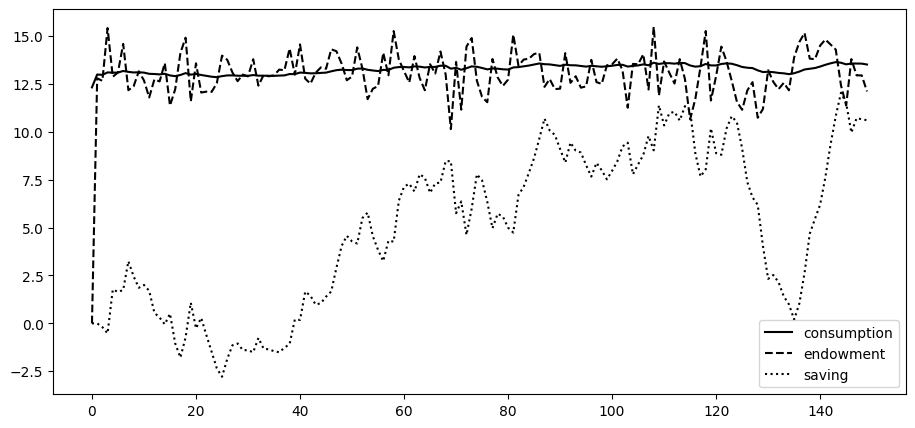

In [73]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)
c[0] = 0
where = 0
for i in range(iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = -F @ y[i] + gan
    # print("c = %d"%c[i])

# print(c.shape)
#plt.ylim((-50,50))
plt.plot(
    np.array(range(iter_t)),
    c[:iter_t],
    linestyle="-",
    label="consumption",
    color="black",
)
plt.plot(
    np.array(range(iter_t)),
    d_get[:iter_t],
    linestyle="--",
    label="endowment",
    color="black",
)
plt.plot(
    np.array(range(iter_t)),
    k_get[:iter_t],
    linestyle=":",
    label="saving",
    color="black",
)
# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")
plt.legend()
plt.savefig('con_end_sav.png')

In [74]:
print(f"c0 = \n {c[0]}")
print(f"y0 = \n {y[0]}")
print(f"k0 = \n {k_get[0]}")

c0 = 
 12.31758506841744
y0 = 
 [1. 0. 0.]
k0 = 
 0.0


In [75]:
# Use the above formulas to create the optimal policies for b_{t+1} and c_t

b_pol = G @ (np.eye(2, 2) - (R - 1) * beta * la.inv(np.eye(2, 2) - beta * A))

# 効用込み
c_pol_utility = (R - 1) * (
    beta * G @ la.inv(np.eye(2, 2) - beta * A) - gan / (R - 1) * G_1
)
c_pol_c = (R - 1) * beta * G @ la.inv(np.eye(2, 2) - beta * A)
# Create the A matrix for a LinearStateSpace instance
A_LSS1 = np.vstack([A, b_pol])
A_LSS2 = np.array([0.0, 0.0, 1.0]).reshape(-1, 1)
A_LSS = np.hstack([A_LSS1, A_LSS2])

# Create the C matrix for LSS methods
C_LSS = np.vstack([C, np.zeros(1)])

# Create the G_c matrix for LSS methods
G_LSS1_c = np.vstack([G, c_pol_c])
G_LSS2_c = np.vstack([np.zeros(1), R - 1])
G_LSS_c = np.hstack([G_LSS1_c, G_LSS2_c])

# Create the G_utirity matrix for LSS methods
G_LSS1_uti = np.vstack([G, c_pol_utility])
G_LSS2_uti = np.vstack([np.zeros(1), R - 1])
G_LSS_uti = np.hstack([G_LSS1_uti, G_LSS2_uti])

# Use the following values to start everyone off at b=0, initial incomes zero
μ_0 = np.array([1.0, 0.0, 0.0])
Σ_0 = np.zeros((3, 3))

In [76]:
ABF - A_LSS

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.33419803e-07, -1.79553660e-08, -1.80499923e-08]])

In [77]:
print(c_pol_utility, "\n", -F)

[[4.3175853  0.05249344]] 
 [[4.31758507 0.05249346 0.0526316 ]]


### Robustnessのモジュールを用いても解いてみよう

In [78]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp,olrprobust,doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
#from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
#from olrprobust_1_using import olrp,olrprobust,doubleo

In [80]:
# y=[1 d k]のやつ

Q = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1e-9]])
A = np.array([[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R]])
B = np.array([[0.0], [0.0], [-1.0]])
C = np.array([[0.0], [c_d], [0.0]])
R_hyouka = np.array([[1]])
F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, -1e-9)

In [81]:
print(-F)

[[4.31758507 0.05249346 0.0526316 ]]


日本語ラベル

In [82]:
iter_t = 150
d_0 = 0.0

np.random.seed(5)
eps = np.random.randn(iter_t)
print(eps[100])
y = np.array([[1.0, 0.0, 0.0]])
# print(y[0])
# print(y.shape)
ABF_1 = A - np.dot(B, F_ro2)
for i in range(iter_t):
    # print(i)
    # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    # Tmp = A -np.dot(B,F) + np.dot(C,K)
    # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
    # print(y)
    # print(y.shape)
    y = np.insert(y, 0, np.dot(ABF_1, y[0].T) + CLQ.T * eps[i], axis=0)
    if i == 0:
        y[0][2] = 0



0.7924226173066341


In [83]:
y_1 = y[::-1]
k_get_1 = y[:, 2]
d_get_1 = y[:, 1]

In [84]:
print(y_1[13])

[ 1.         12.62790506  0.3028189 ]


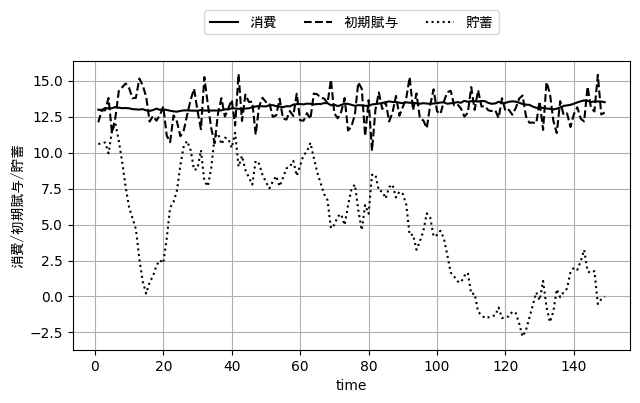

In [85]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)

for i in range(1, iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = -F_ro2 @ y_1[i] + gan
    # print("c = %d"%c[i])

# print(c.shape)
plt.figure(figsize=[6.5, 4.2])

# Plot consumption
plt.plot(
    np.array(range(1, iter_t)),
    c[1:iter_t],
    linestyle="-",
    label="消費",
    color="black",
)

# Plot endowment
plt.plot(
    np.array(range(1, iter_t)),
    d_get_1[1:iter_t],
    linestyle="--",
    label="初期賦与",
    color="black",
)

# Plot saving
plt.plot(
    np.array(range(1, iter_t)),
    k_get_1[1:iter_t],
    linestyle=":",
    label="貯蓄",
    color="black",
)

# Legend with specified arguments
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),
    ncol=3,
    prop={"family": "MS Gothic", "size": 10},
)
plt.xlabel("time", fontsize=10)
plt.ylabel("消費/初期賦与/貯蓄", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.savefig("con_end_sav.png")

英語ラベル

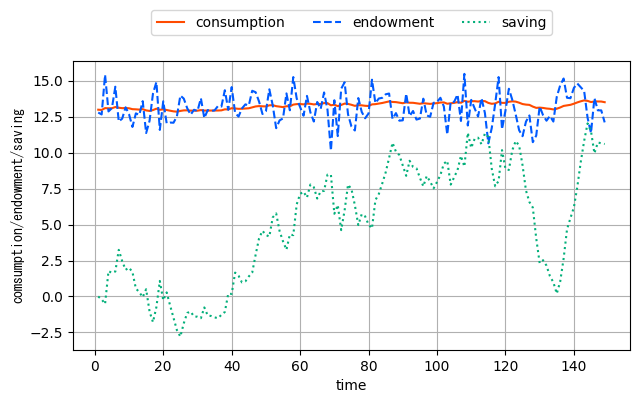

In [86]:
# print(c.shape)
plt.figure(figsize=[6.5, 4.2])

colorlist = [
    "#FF4B00",
    "#005AFF",
    "#03AF7A"
]
# Plot consumption
plt.plot(
    np.array(range(1, iter_t)),
    c[1:iter_t],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
    
)

# Plot endowment
plt.plot(
    np.array(range(1, iter_t)),
    d_get[1:iter_t],
    linestyle="--",
    label="endowment",
    color=colorlist[1],
    
)

# Plot saving
plt.plot(
    np.array(range(1, iter_t)),
    k_get[1:iter_t],
    linestyle=":",
    label="saving",
    color=colorlist[2],
    
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()

# plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")

plt.savefig("con_end_sav_en.png")

In [87]:
print(c_pol_utility)
print(-F)
print(-F_ro2)

[[4.3175853  0.05249344]]
[[4.31758507 0.05249346 0.0526316 ]]
[[4.31758509 0.05249346 0.0526316 ]]


orlp1[[-4.41994951  0.05249348  0.05263162]]  
orlp2_doubling[[1.05669237e-03 1.68060854e-05 1.68503619e-05]]
orlp3[[-4.41994765  0.05249346  0.0526316 ]]

### uncertaintyあげて実験

In [88]:
iter_t = 1000
d_0 = 0.0

sig_arr=[-1e-5, -9]
y = np.zeros((1, 3))
for where, sig in enumerate(sig_arr):
    F_ro2, K_ro2, P_ro2, Pt_ro2 = olrprobust(beta, A, B, C, Q, R_hyouka, sig)


    np.random.seed(5)
    eps = np.random.randn(iter_t)
    y = np.insert(y, 0, np.array([1, 0, d_0]), axis=0)
    ABF = A - np.dot(B, F)
    # print(y[0])
    # print(y.shape)
    for i in range(iter_t):
        # print(i)
        # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
        # Tmp = A -np.dot(B,F) + np.dot(C,K)
        # print(f"y = \n{np.dot(Tmp, y[0].T) + CLQ.T * eps[i]}")
        # print(y)
        # print(y.shape)
        y = np.insert(y, 0, np.dot(ABF, y[0].T) + CLQ.T * eps[i], axis=0)

In [89]:
y=y[:(iter_t+1)*len(sig_arr)]
y.shape

(2002, 3)

In [90]:
print(y)

[[  1.          13.12746762  20.0967395 ]
 [  1.          13.31620089  19.79713744]
 [  1.          12.98588758  19.81050941]
 ...
 [  1.          12.65869122 -12.51539817]
 [  1.          12.79122749 -12.31758507]
 [  1.           0.           0.        ]]


In [91]:
y = y[::-1]
# print(y)
k_get = y[:, 1]
d_get = y[:, 2]

one_get = y[:, 0]
x = np.array(range(iter_t + 1))

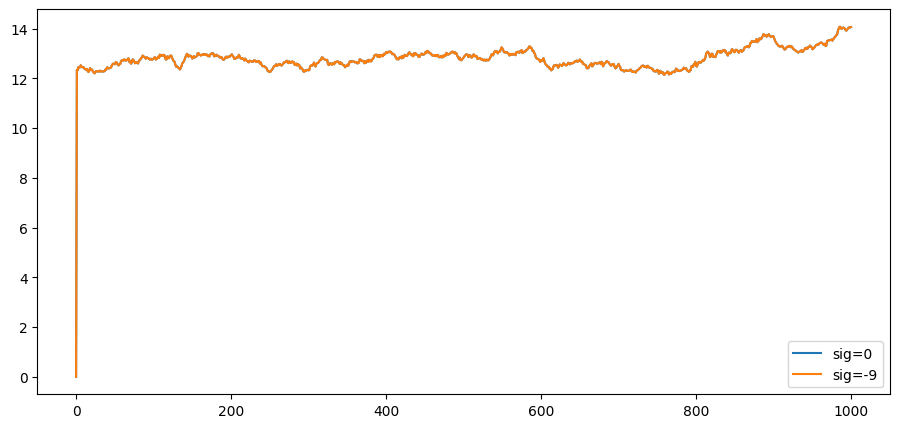

In [92]:
for where, sig in enumerate(sig_arr):
    c = np.zeros(iter_t+1)
    # print("c size before %d"%c.shape)
    c[0] = 0
    for i in range(1, iter_t+1):
        #print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
        c[i] = -F @ y[i] + gan
        #print("c = %d"%c[i])
        if c[i] <-800:
            print("whe=%d,sig=%d,i=%d"%(where,sig,i))
    plt.plot(
        x,
        c,
        label="sig=%d" % sig,
    )
    plt.legend(prop={"size": 10})

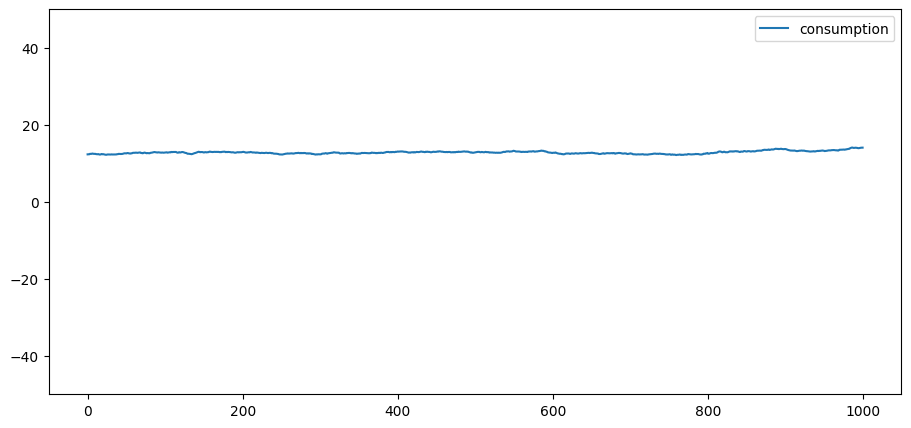

In [93]:
c = np.zeros(iter_t + 1)
# print("c size before %d"%c.shape)
c[0] = 0
where = 0
for i in range(iter_t):
    # print("k = %d"%k_get[(iter_t + 1) * where + i - 1])
    # print(i)
    # print(y[i])
    c[i] = -F @ y[i] + gan
    # print("c = %d"%c[i])

# print(c.shape)

plt.plot(np.array(range(iter_t)), c[:iter_t], label="consumption")
#plt.plot(np.array(range(iter_t)), d_get[:iter_t], label="endowment")
#plt.plot(np.array(range(iter_t)), k_get[:iter_t], label="saving")
#plt.axhline(y=gan, xmin=0.0, xmax=iter_t, color="r")
plt.ylim((-50,50))
plt.legend()